# MINI Project 2 -- Epidemic simulation 

## Before you start
Read the following instructions carefully.

- Prerequisite: `functions`, `modules`, `lists`, `matplotlib`
- New concepts: `numpy` and more on `matplotlib`. In order to learn these packages, you need go through the examples via the links in this file.
- Estimated working time: 10 hours
- Work procedure: This is an individual work, __you are expected to write your own code, and you must be able to explain it in your own words__.
- Examination: you must present your solution to tasks **A, B, C and D** __individually__ to a teacher or assistant teacher according the time at the course home page.
- Optional Tasks: Optional tasks are non-mandatory, but they will _help you to get higher grade in the final exam_.

## The Epidemic Simulation

An epidemic is a rapid spread of infectious disease to many people within a short period of time. 
For example, the [_Black Death_][BlackDeath] is one of the most devastating epidemics in human history, which is estimated to have killed up to 60% of Europe's  population.
The Black Death was mainly due to the [bubonic plague][bubonic_plague], which is a bacterial infection. 
Without treatment, bubonic plague results in the death of 30% to 90% of cases.

Knowledge of how diseases spread is important to prevent epidemics such as the Black Death. 
In this MINI project, we create a simulation tool for investigating the spread of a disease over a population with the [SIR model][SIR] (Susceptible-Infectious-Recovered model).


[BlackDeath]: https://en.wikipedia.org/wiki/Black_Death
[bubonic_plague]: https://en.wikipedia.org/wiki/Bubonic_plague
[SIR]: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

## The SIR Model

This model describes the process of infectious diseases transmitted from human to human, where recovered individuals are immune to the disease.
The three groups in SIR model are defined as:
- S (Susceptible). These are healthy people that can be infected.
- I (Infectious). People in this group are currently infected and can infect others.
- R (Recovered). These are people who are not infected anymore and cannot infect others. There are several reasons for this: they can be recovered from the disease, they can have died, or they can have been vaccinated.

In this MINI project, you will learn to use the library [`numpy`][numpy], which is an open source library for multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

### The 1D model

Denote the number of people in these three groups at week number $n$ by $S_n, I_n$ and $R_n$. 
Assume that one can only go through the direction `S` $\rightarrow$ `I` $\rightarrow$ `R`, such that no reinfection can happen in this model.
Then, the SIR model is given by the following update equations at week $n$
\begin{equation}
    \begin{split}
         S_n &= S_{n-1} - aS_{n-1}I_{n-1},\\
         I_n &= I_{n-1} + aS_{n-1}I_{n-1} - bI_{n-1},\\
         R_n &= R_{n-1} + bI_{n-1},\\
     \end{split}
\end{equation}
where $S_{n-1}, I_{n-1}$ and $R_{n-1}$ are the group sizes in week $n-1$, $a$ is the rate of a susceptible becoming infected, $b$ is the recovery rate.
This simulation starts from week 0 with given $S[0], I[0]$ and $R[0]$ values.

**Note 1**: The total population satisfies $N =S[0]+I[0]+R[0]$.

**Note 2**: This model is an approximation of the reality, so it is possible for `S`, `I` and `R` to be non-integers.
 
 
[numpy]: https://numpy.org/

### Calculating the death tolls

The SIR model does not distinguish the death from the recovery group. 
But, we can calculate the death tolls (the number of people dying each week) from the number of susceptible, infected and recovered in each week.
For example, the Black Death ended in death in about 90% of those who got infected (notice that antibiotic treatment against the plague were only discovered in 1928).
We can assume that 90% of the individuals who enter the recovered group from infected group die during this process.
This is to calculate the differences between the number of recovery in the current week compared with the previous week.
To do this, you can use the function `numpy.diff` on the array `R` after the simulation, read the document of [`numpy.diff`][diff].

**Note**: The function `numpy.diff(R)` returns an array with size `R.shape[0]-1`.

[diff]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html

### **Mandatory Task A:**
1. Go through **The Basics** of the [official tutorial][numpyTutorial] of `numpy`, try with the given examples.

2. Implement the SIR model as a function 
``` python
def SIR(S0, I0, R0, a, b, T=100):
    ...
    return S, I, R, t
```
where `S0` is the initial size of the susceptible population, `I0` is the initial number of infected, `R0` is the initial number of recovered, `a` and `b` are the rates in the model, `T` is the total amount of weeks of the simulation. 
The function returns four `numpy.ndarray`s including the time series `t`, and the solutions `S`, `I` and `R`. 
These four arrays should start from week 0 and have the same shape.

3. Simulate the SIR model with $S_0=995, I_0=5, R_0=0, a=0.0005, b=1/7, T=40$ and plot the solutions of `S`, `I` and `R` with different colors using `matplotlib`. 
4. Add labels, legend, title, and other information to make the figure easy to read.
5. Calculate the death tolls with 90% rate for this simulation.
6. Rearrange your plot, such that the SIR solutions and the death rolls are shown in the same figure with **two panels**: the upper panel is for the SIR and the lower is for the death toll. You should create this figure with `matplotlib.pyplot.subplots`. 

7. (Optional) Use the weekly death tolls to compute the cumulative number of the died individuals.

**Note**: In this task, you should **only** use `numpy.ndarray` for all the array, no `list` or `dict`.

An example of the final figure is shown as following.



[numpyTutorial]: https://numpy.org/devdocs/user/quickstart.html

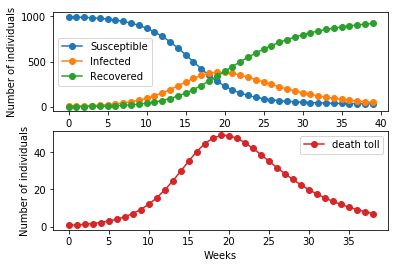

In [6]:
%run SIR1D.py

## The 2D SIR model

Most diseases spread from one individual to another only if they are close to each other. 
To take this factor into account, we expand the 1D SIR model to two dimensional such that the SIR model becomes a spatial model which includes the distribution and variation of the disease in space and time. 
We can use this model to examine how a disease develops and how to stop it.

### 2D representation

We start with a grid of people with $M$ rows and $N$ columns. 
This contains $M\times N$ individuals and we can use a two dimensional array to store it.
Each infected individual may only transmit the disease to their immediate neighbors in the array, as that is the only people they are in contact with.

### Stages of the disease

The value of each element in the array is the current stage of the individual. 
For the SIR model, we represent the groups by integers:
``` python
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2
```
You can use [`numpy.ones`][npones] or [`numpy.zeros`][npzeros] to initialize the 2D array, and then change some of the elements according to the initial condition.

The following example shows an $8\times6$ grid with all the individuals are `SUSCEPTIBLE`, except `[4,3]` is `INFECTED` and `[3,3]` is `RECOVERED`.

**Note**: The implementation of the module `epidemics`, functions `createSIR2D` and `plot2D_SIR` are **the tasks for you to complete**. The details are given in the following sections.


[npones]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html
[npzeros]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


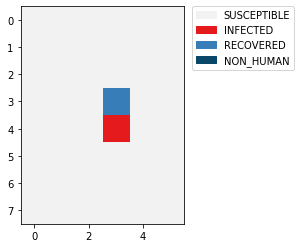

In [2]:
import numpy as np
from epidemics import *

grid = createSIR2D(rows=8, columns=6)
grid[4, 3] = INFECTED
grid[3, 3] = RECOVERED
print(grid)

plot2D_SIR(grid)

### Rules of the 2D SIR model

**Remark**: Read the rules carefully and follow them step by step, these are the instructions of your 2D SIR simulator.

The rules of how the disease is transmitted and developed are as following:
1. For an infected individual, as shown above at `(4,3)` (red), it may only transmit the disease to the immediate neighbors and only if the neighbors are `SUSCEPTIBLE`. In this case, the individuals `(4,2)`, `(4,4)` and `(5,3)` can be infected. The individual `(3,3)` should not be included since it is already `RECOVERED`.
2. Within one week, an infected individual has a probability $\alpha$ of infecting a susceptible neighbor. This means, each of the three individuals `(4,2)`, `(4,4)` and `(5,3)` has its individual chance to be infected. 
3. During the same week, each infected individual can recover (either die or become immune) with a probability $\beta$.

**Note**: You can generate random numbers to represent probabilities. For example, the function `numpy.random.rand()` can generate a random number between 0 and 1. For the three individuals in `(4,2)`, `(4,4)` and `(5,3)`, you can generate three random numbers correspondingly. If the number is smaller than $\alpha$, this individual will be infected. 

### Mandatory Task B

**Before you start working on this task, read the instruction above carefully. Make sure you understand how the model evolves.**

1. Download the module [epidemics](epidemics.py) from the course website. Implement all the following functions into this module. This module can then be imported by other scripts to accomplish Tasks C and D.

2. Implement your first function `createSIR2D(rows, columns)` to return a 2D grid of size `(rows, columns)` and of type `numpy.ndarray` where all the individuals are `SUSCEPTIBLE`.

3. Implement another function `findNeighbors(grid, i, j)` which finds all the neighbors `(i-1,j), (i+1,j), (i,j-1), (i,j+1)` and then returns those who are **susceptible**, in a list. For instance, using the grid shown in the previous section, if we call 
```python
print(findNeighbors(grid, 4, 3))
```
Then, the output should be (might be in a different order)
```python
>>> [(4, 2), (4, 4), (5, 3)]
```

4. Implement a function `infect(grid, i, j, alpha)` that, given a grid and the position of an individual, returns `True` if the individual is getting infected, else `False`. In other words, it returns `True` with probability `alpha`, else `False`. Remember to check that the individual at `(i, j)` is susceptible in the first place (else return `False` since this individual cannot become infected).

5. Implement function `recover(grid, i, j, beta)` that, given a grid and the position of an infected individual, returns `True` if `(i,j)` is going to recover in the next week else `False`. Notice, you should first check if `(i,j)` is infected. If not, it is not going to become recovered anyway.

6. In order to visualize the simulation, you might need to generate a plot according to the 2D data. You can use [**imshow**][imshow] from `matplotlib` to display the data on a 2D regular raster. Write a function `plot2D_SIR(grid)` which takes a given 2D grid and generate a 2D plot of it. Use [legend][legendGuide] or [colorbar][colorEx] to indicate different stages of the disease. To change the `colormap`, you can also check this [example][creatingColormaps]. 

7. Have you thought about the boundaries when implementing the `findNeighbors` function? What will happen if `(i,j)` is `(4, 5)`? It will try to access `(4,6)` which is out of the bound of your 2D array. There are two way to fix this (you need to implement at least one of them): 
    - In the function `findNeighbors`, you can distinguish the interior elements and boundary elements in the 2D array and treat them differently.
    - You can add **ghost** elements outside the boundary. This can be done by modifying your function `createSIR2D(rows, columns, boundary=True)` with an option to generate an array of shape the `(row+2,columns+2)` and put `NO_HUMAN` on the ghost boundary. An example of the output is shown below. _Keep in mind, if you add ghost boundaries, then the indices will all be shifted by 1._
    
    

**Note 1**: Step 6 might be difficult, you will need some search on the Internet. In the `epidemics` module you downloaded, there is a function `SIRcmap` which can generate a colormap for this project. You can decide to use it or some other color maps. But, make sure you use only four different colors for the different stages.

**Note 2**: Make your functions are correct by writing necessary tests for each of the functions before you move on to the next section.

**Note 3**: For task 7, if you only implement one case, you should discuss with the teachers on the other case during the lab. Try to argue which way is better, with respect to implementation and performance.



[colorEx]: https://matplotlib.org/3.1.1/gallery/ticks_and_spines/colorbar_tick_labelling_demo.html
[legendGuide]: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
[imshow]: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
[creatingColormaps]: https://matplotlib.org/3.1.1/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py

[[3. 3. 3. 3. 3. 3. 3. 3.]
 [3. 0. 0. 0. 0. 0. 0. 3.]
 [3. 0. 0. 0. 0. 0. 0. 3.]
 [3. 0. 0. 0. 0. 0. 0. 3.]
 [3. 0. 0. 0. 2. 0. 0. 3.]
 [3. 0. 0. 0. 1. 0. 0. 3.]
 [3. 0. 0. 0. 0. 0. 0. 3.]
 [3. 0. 0. 0. 0. 0. 0. 3.]
 [3. 0. 0. 0. 0. 0. 0. 3.]
 [3. 3. 3. 3. 3. 3. 3. 3.]]


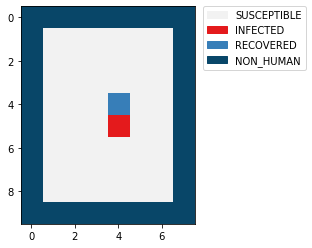

In [3]:
import numpy as np
from epidemics import *

grid = createSIR2D(rows=8, columns=6, boundary=True)
grid[5, 4] = INFECTED
grid[4, 4] = RECOVERED
print(grid)

plot2D_SIR(grid)

### Mandatory Task C -- Put everything together


So far, you should have all the necessary functions. Now, let's put everything together.

1. Implement a function `time_step(current_grid, alpha, beta)` which takes `previous_grid` from the current week and generate a new grid for the next week, with the two probabilities $\alpha$ and $\beta$. The structure of this function follows:
```python
def time_step(current_grid, alpha, beta):
    ...
    new_grid = current_grid.copy()
    ...
    return new_grid
```
In this function, you should follow the instructions in the "**Rules of the 2D SIR model**" section, go through all the infected elements, find all the susceptible neighbors, try to infect these neighbors, and try to recover on themselves. 

2. Extend your `plot2D_SIR` function to plot snapshots of the simulation. Use titles, or other indicators to distinguish between different time steps.

3. Use the following example as a starting point to test your simulator. If everything works properly, you should be able to use the following code to generate similar plots.

4. (Optional) The snapshots are in different figures which are not easy to read. Using `subplots`, write a function `plotSnapshots(grid, N)` to plot all the snapshots in a single figure.

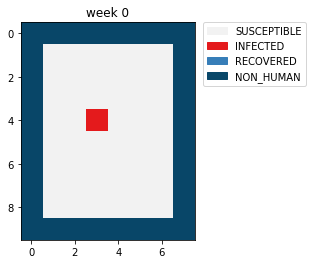

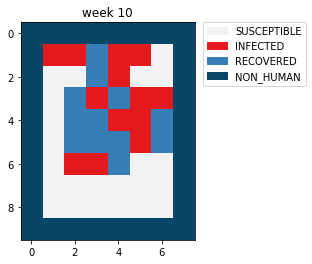

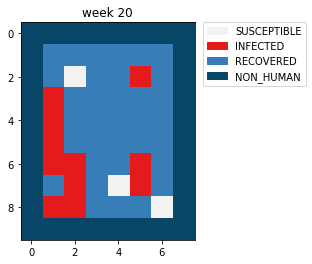

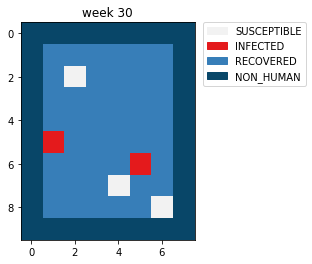

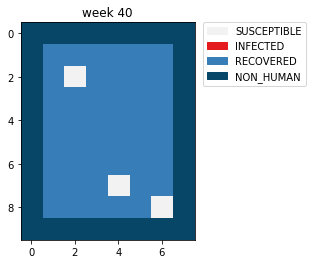

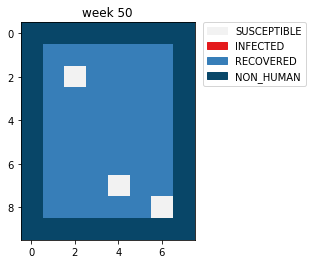

[None, None, None, None, None, None]

In [4]:
from epidemics import *
import numpy as np

# a seed for random number generators, this is not necessary
np.random.seed(1203)

# Settings
T = 50
M = 8
N = 6
alpha = 0.2
beta = 0.15

# Initialize the grid
grid = createSIR2D(rows=M, columns=N, boundary=True)
grid[4, 3] = INFECTED
grids = []
grids.append(grid)

# Run the simulation
for n in range(T):
    grid = time_step(grid, alpha, beta)
    grids.append(grid)

# Plot the results
[plot2D_SIR(grids[t], title=f'week {t}') for t in np.arange(0,T+1,T//5)]

### Mandatory Task D -- To the real world

1. Test your simulator for $T=200, M=52, N=52$ and take `grid[22:28, 22:28] = INFECTED` for the initial condition. Plot **at most** 10 snapshots.

2. To compare with the 1D model, we can collect the number of S, I, and R individuals at each time point from your results, and plot them as in Task A. For a 2D array `arr` in `numpy`, it is very easy to count the number of elements which equal to a given value, say `INFECTED`. You can use `numpy.sum(arr == INFECTED)`. Plot the evolution of S, I and R (like for task 1).

3. The final goal is to use your simulator to work with the real world. Download [worldmapCoarse.dat](worldmapCoarse.dat) and load it to your initial grid by `grid = numpy.loadtxt('worldmap.dat', dtype=int, delimiter=',')`. Try to set an initial infection area, say `grid[10:12, 80:82] = INFECTED`, then simulate for 100 weeks. Use your snapshot functions to visualize the results. 

8. If everything works fine so far, download [worldmap.dat](worldmap.dat), which is a much finer grid. Set some initial infections at different locations and try to tune all the parameters to see if you can get the whole world infected. An example is shown in the end of this project.

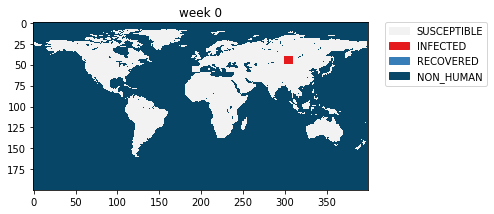

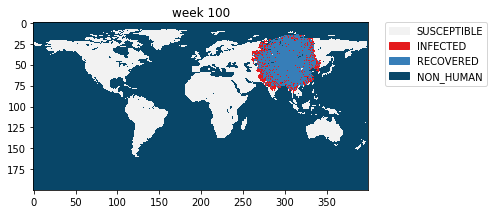

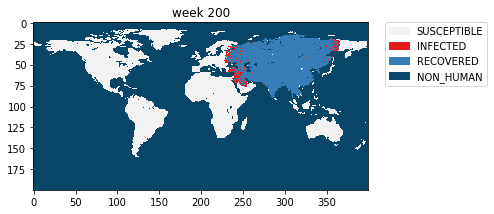

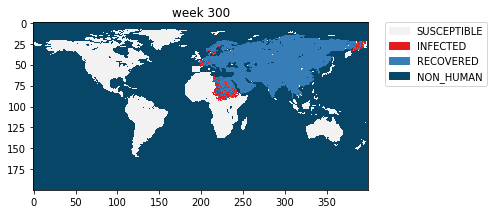

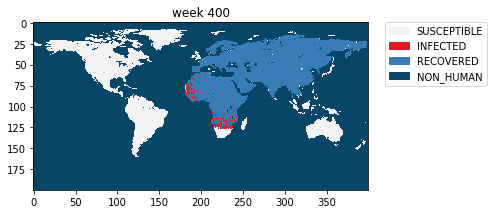

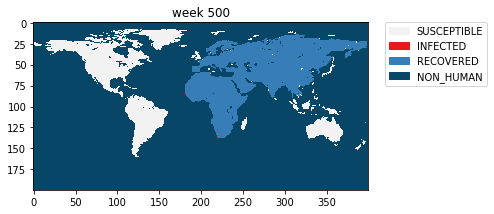

In [5]:
%run worldSIR.py